### Filtragem inicial dos dados sobre Leishmaniose Tegumentar Americana

#### Toda nossa análise foi feita acerca dos anos de 2015 até 2019 que foram os dados disponíveis publicamente até então

### Integrantes:
Nome                     | RA    | Especialização
-------------------------| ------| --------------
Carolina Muller Ferreira |210904 | Saúde
Letícia Moreno           |235497 | Saúde
Lucas Feliciano da Silva |182487 | TI 
Paulo Victor             |224943 | TI


##### Fonte: LEISHMANIOSE TEGUMENTAR AMERICANA - Casos confirmados Notificados no Sistema de Informação de Agravos de Notificação - Brasil - (SINAN, 2015 a 2019)
Dados tabulares:
http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sinannet/cnv/ltabr.def

Dados completos:
ftp://ftp.datasus.gov.br/dissemin/publicos/SINAN/DADOS/FINAIS/

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("LTA_total.csv")



A:\miniconda3\envs\pandasenv\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### É necessário fazer uma filtragem das colunas que vão ser necessárias nesta análise e excluindo dados não definidos

In [9]:
sig_cols =   [
    # Dados do paciente
    'DT_NOTIFIC', # Data de notificação
    'NU_IDADE_N', # Idade
    'CS_SEXO',    # Sexo
    'CS_GESTANT', # Gestante
    'CS_RACA',    # Raça
    'CS_ESCOL_N', # Escolaridade
    'SG_UF',      # Sigla da UF d residência do paciente

    # Sintomas
    'CLI_CUTANE', # Presença de lesão cutânea
    'CLI_MUCOSA', # Presença de lesão mucosa
    #'CLI_CICATR', # Presença de cicatrizes cutâneas na existência de lesões cutâneas
    
    # Diagnósticos
    'LAB_PARASI', # Resultado de exame parasitológico
    'LAB_IRM',    # Resultado do Intradermoreação de Montenegro (IRM)
    'LAB_HISTOP', # Resultado do exame histopatológico
    
    # Desfecho
    'EVOLUCAO',   # Evolução do caso
]
df = pd.read_csv("LTA_total.csv", usecols=sig_cols)#'PESO',

UF = {52:'GO',31:'MG',15:'PA',23:'CE',29:'BA',41:'PR',42:'SC',26:'PE',17:'TO',21:'MA',24:'RN',22:'PI',43:'RS',51:'MT',
     12:'AC',35:'SP',32:'ES',25:'PB',28:'SE',27:'AL',13:'AM',50:'MS',14:'RR',16:'AP',11:'RO',33:'RJ',53:'DF'}


df = df.replace({'SG_UF':UF})#alterando os valores dos indices de cada UF para suas respectivas siglas


df['DT_NOTIFIC'] = df['DT_NOTIFIC'].astype(str).str[:4]#Pegando só o ano de notificação do caso de Leishmaniose


df = df[(df.CS_SEXO == 'M') | (df.CS_SEXO == 'F')]#removendo os dados onde o sexo não estava definido

#removendo todos os valores que não representem diretamente uma idade maior que 1
df = df[df['NU_IDADE_N'].astype(str).str.startswith('4')]
df['NU_IDADE_N'] = df['NU_IDADE_N'].astype(str).str[1:]
df['NU_IDADE_N']= pd.to_numeric(df['NU_IDADE_N'])

#removendo os valores onde foi ignorado a presença de lesão cutânea
df = df[(df.CLI_CUTANE == 1.0) | (df.CLI_CUTANE == 2.0)]
#removendo os valores onde foi ignorada a presença de lesão mucosa
df = df[(df.CLI_MUCOSA == 1.0) | (df.CLI_MUCOSA == 2.0)]


#removendo casos onde houveram transferencia de pacientes
df = df[(df.EVOLUCAO == 1.0) | (df.EVOLUCAO == 2.0) | (df.EVOLUCAO == 3.0) | (df.EVOLUCAO == 4.0)]
df['EVOLUCAO'].value_counts()
#1 = curado , 2 = abandonou tratamento , 3 = óbito por leishmaniose, 4 = óbito por outras causas

1.0    60749
2.0     2302
4.0      407
3.0       72
Name: EVOLUCAO, dtype: int64

In [15]:
df["CS_SEXO"].head()

0    M
1    M
2    F
3    M
4    M
Name: CS_SEXO, dtype: object

## Matriz de correlação destas variáveis relacionadas a leishmaniose

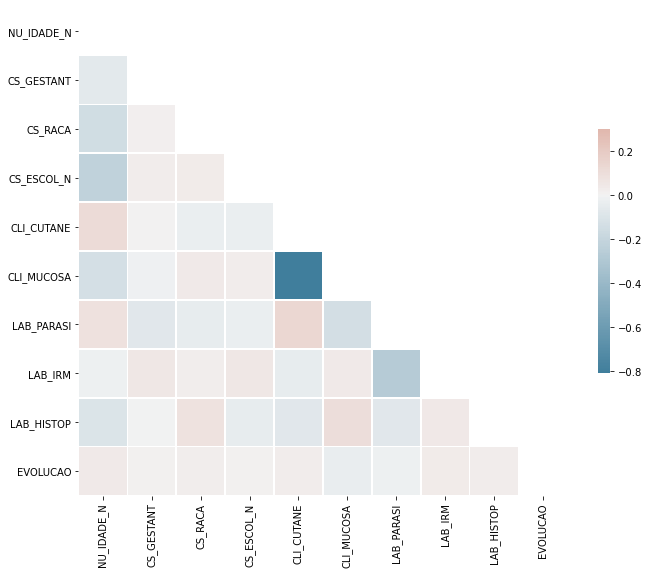

In [16]:

corr = df.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

## Ocorrência de casos registrados de leishmaniose ao longo dos anos de 2015~2019

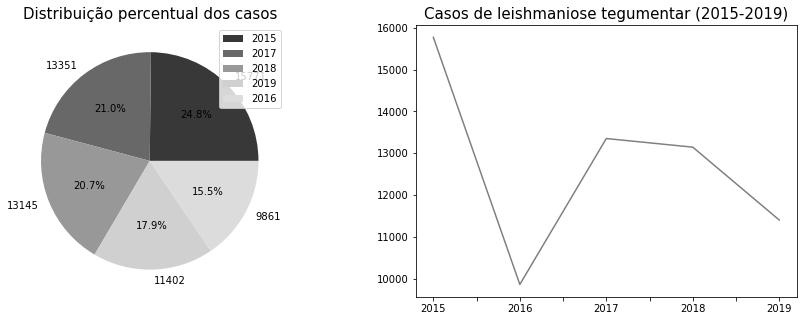

2015    15771
2017    13351
2018    13145
2019    11402
2016     9861
Name: DT_NOTIFIC, dtype: int64


In [11]:
df['DT_NOTIFIC'].value_counts().index
f, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))

#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#33aa44']
#colors = plt.cm.binary(np.linspace(0.25, 0.75, len(df['DT_NOTIFIC'].unique())))
#colors = [,,,,]
colors = ['#383838','#686868','#989898','#D0D0D0','#DCDCDC']


#gráfico de pizza dos casos nestes 5 anos
plt.title('Casos de leishmaniose tegumentar (2015-2019)',fontsize=15)
ax1.set_title('Distribuição percentual dos casos',fontsize=15)
ax1.pie(df['DT_NOTIFIC'].value_counts(),labels=df['DT_NOTIFIC'].value_counts(),autopct='%1.1f%%',colors=colors)
ax1.legend(df['DT_NOTIFIC'].value_counts().index)


#série temporal
years=['2015','2016','2017','2018','2019']
df['DT_NOTIFIC'].value_counts().loc[years].plot(color='gray')

#ax2.plot(df['DT_NOTIFIC'].value_counts())
plt.show()
print(df['DT_NOTIFIC'].value_counts())

## Situação final dos afetados por Leishmaniose nos anos em questão

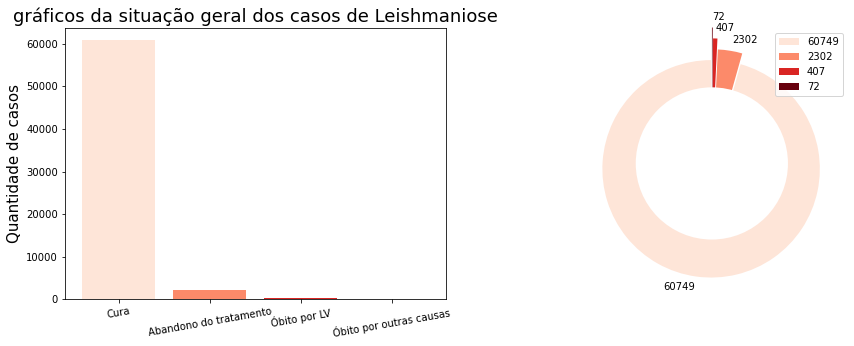

1.0    95.622541
2.0     3.623485
4.0     0.640642
3.0     0.113332
Name: EVOLUCAO, dtype: float64
1.0    60749
2.0     2302
4.0      407
3.0       72
Name: EVOLUCAO, dtype: int64


In [12]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
status = ['Cura','Abandono do tratamento','Óbito por LV','Óbito por outras causas']

##bar plot

colors = colors = plt.cm.Reds(np.linspace(0.1, 1, len(df['EVOLUCAO'].unique())))
ax1.set_title('gráficos da situação geral dos casos de Leishmaniose',fontsize=18)
ax1.bar(status,df['EVOLUCAO'].value_counts(),color=colors) #plotando status dos pacientes de ao longo destes anos
ax1.tick_params(axis='x', labelrotation = 10)
ax1.set_ylabel('Quantidade de casos',fontsize=15)

##donut plot
explode = (0.05,0.05,0.15,0.25)

ax2.pie(df['EVOLUCAO'].value_counts(), colors = colors, labels=df['EVOLUCAO'].value_counts(), startangle=90, pctdistance=0.85, explode = explode)#draw circle
ax2.legend(df['EVOLUCAO'].value_counts())

#setando o circulo central do donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# donut
plt.show()

print( (df['EVOLUCAO'].value_counts()/df['EVOLUCAO'].count())* 100)
print( df['EVOLUCAO'].value_counts() )

## Mortalidade nos casos de leishmaniose

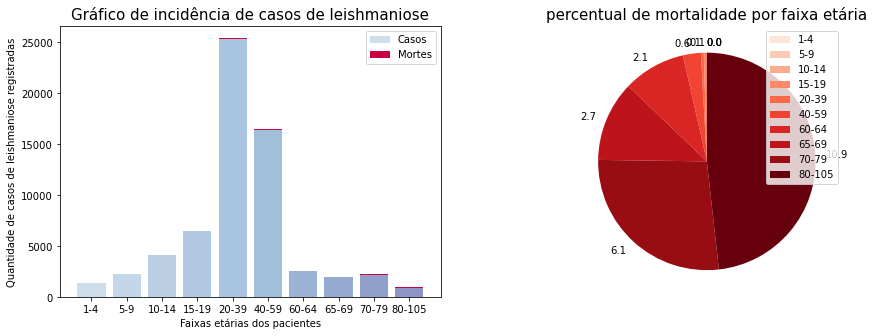

['0.0', '0.0', '0.0', '0.1', '0.1', '0.6', '2.1', '2.7', '6.1', '10.9']


In [13]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

ages=['1-4','5-9','10-14','15-19','20-39','40-59','60-64','65-69','70-79','80-105']

plt.title('percentual de mortalidade por faixa etária',fontsize=15)

#pegando a quantidade de casos cujas idades estejam na faixa etária especificada
btwn1 = df['NU_IDADE_N'].between(1,4,inclusive=True).value_counts()[1] #faixa entre 1~4 anos
btwn2 = df['NU_IDADE_N'].between(5,9,inclusive=True).value_counts()[1] #faixa entre 5~9 anos
btwn3 = df['NU_IDADE_N'].between(10,14,inclusive=True).value_counts()[1] #faixa entre 10~14 anos
btwn4 = df['NU_IDADE_N'].between(15,19,inclusive=True).value_counts()[1] #faixa entre 15~19 anos
btwn5 = df['NU_IDADE_N'].between(20,39,inclusive=True).value_counts()[1] #faixa entre 20~39 anos
btwn6 = df['NU_IDADE_N'].between(40,59,inclusive=True).value_counts()[1] #faixa entre 40~59 anos
btwn7 = df['NU_IDADE_N'].between(60,64,inclusive=True).value_counts()[1] #faixa entre 60~64 anos
btwn8 = df['NU_IDADE_N'].between(65,69,inclusive=True).value_counts()[1] #faixa entre 65~69 anos
btwn9 = df['NU_IDADE_N'].between(70,79,inclusive=True).value_counts()[1] #faixa entre 70~79 anos
btwn10 = df['NU_IDADE_N'].between(80,df['NU_IDADE_N'].max(),inclusive=True).value_counts()[1] #faixa entre 80~105 anos

cases=[btwn1,btwn2,btwn3,btwn4,btwn5,btwn6,btwn7,btwn8,btwn9,btwn10] #quantidade de casos por faixa etária

def get_mortality(df,init,end): #pegando a quantidade de óbitos por faixa etária(linhas=shape[0])
    df = df[df['NU_IDADE_N'].between(init,end,inclusive=True)]
    return df[ (df['EVOLUCAO'] == 3.0) | (df['EVOLUCAO'] == 4.0)].shape[0]

btwn1 = get_mortality(df,1,4)
btwn2 = get_mortality(df,5,9)
btwn3 = get_mortality(df,10,14)
btwn4 = get_mortality(df,15,19)
btwn5 = get_mortality(df,20,39)
btwn6 = get_mortality(df,40,59)
btwn7 = get_mortality(df,60,64)
btwn8 = get_mortality(df,65,69)
btwn9 = get_mortality(df,70,79)
btwn10 = get_mortality(df,80,105)

mortality=[btwn1,btwn2,btwn3,btwn4,btwn5,btwn6,btwn7,btwn8,btwn9,btwn10] #quantidade de óbitos por faixa etária

legend=['Casos','Mortes']
colors = plt.cm.BuPu(np.linspace(0.2, 0.5, len(mortality)))

#plotando gráfico de barra da quantidade de casos de leishmaniose com a quantidade de mortes
ax1.set_title('Gráfico de incidência de casos de leishmaniose',fontsize=15)
ax1.set_xlabel('Faixas etárias dos pacientes')
ax1.set_ylabel('Quantidade de casos de leishmaniose registradas')
ax1.bar(ages,cases,color=colors)
ax1.bar(ages,mortality,bottom=cases , color='#cb003f')
ax1.legend(legend)

#mostrando percentagem de óbitos por faixa etária
death_perc = [mortality[i]*100/cases[i] for i in range(len(mortality))]
death_perc = ["{0:0.1f}".format(i) for i in death_perc]

#pie plot
colors = plt.cm.Reds(np.linspace(0.1, 1, len(mortality)))
ax2.pie(death_perc, colors = colors, startangle=90,labels=death_perc ,pctdistance=0.85)#draw circle
ax2.legend(ages)

plt.show()
print(death_perc)